# Mid Essex Hospital Services NHS Trust training booklet

# Main Objective
### Build an AI tool engineered to assist with the generation of content for new courses – with the aim of enhancing efficiency by lowering costs and increasing the resource availability for Capita Learning.

### Transform raw learning content (often in the form of PDFs or word documents) into interactive learning courses. 

Using the raw learning material provided, the Data & AI team is using Retrieval Augmented Generation (RAG) to build the new content 

In [1]:
# If not installed uncomment below

#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [8]:
# Import the necessary libraries for analysis
import json
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load English language model for SpaCy
nlp = spacy.load("en_core_web_sm")

In [3]:
file_path = r"B:\Documents - Storage\.MSc Data Analytics\SEM1-2 MS984 - Data Analytics in Practice\Case 5 Group 3\training_booklet.json"

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

In [4]:
# Structure

print(type(data))

print(data.keys())

<class 'dict'>
dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80'])


# Bag of Words analysis

## Analysis focusing on key themes from the Safeguarding Adults (page 20-26) and Children (page 29-39) sections (assessment question sheets excluded)

In [26]:
# Text from Safeguarding Adults and Safeguarding Children sections
text_safeguarding_Adults = """
  "20": "Safeguarding adults (Level 2) Regulations CQC - Outcome 7 Learning outcomes Once you have completed this workbook you will:  Have an understanding of the background to adult safeguarding  Have some knowledge of national guidance and legislation  Be able to recognise different categories of abuse . Have an increased awareness of Mid Essex Hospital Trust (MEHT) adult safeguarding procedures and how to report concerns or actual abuse  Be able to identify indicators of abuse Guidance and legislation Everyone has a role to play in safeguarding vulnerable adults from abuse and ensuring they live a life free from it. Following the publication of 'No Secrets': guidance on developing and implementing multiagency policies and procedures to protect vulnerable adults from abuse (2000), procedures have been put in place locally to address adult safeguarding concerns. These are in the form of Southend Essex & Thurrock (SET) Safeguarding Adult Guidelines using multiagency procedures to safeguard vulnerable adults from abuse. For more information on 'No Secrets' (2000) please visit the Safeguarding Adult intranet page. Everyone has the right to live their life free from abuse and this right is underpinned by the duty on public agencies under the Human Rights Act (1998) to intervene proportionately to protect the rights of citizens. MEHT Safeguarding Adult policy encompasses the SET Guidelines following key concepts as part of the multiagency approach, including the Department of Health's document on Safeguarding Adults: The Role of Health Care Practitioners. Linking to empowerment, prevention, protection, proportionality, partnership and accountability. Our guidance and procedures are based on the principle that people should be enabled to make their own decisions about their lives and should be made aware of any choices and options available to help them make decisions. For more information on MEHT's Safeguarding Adult Policy please visit MEHT's Adult Safeguarding intranet page. Definition of a vulnerable adult A vulnerable adult is defined in No Secrets as a person aged 18 years or over, \"who is or may be in need of community care services by reason of mental or other disability, age or illness; and who is or may be unable to take care of him or herself, or unable to protect him or herself against significant harm or exploitation\". The person may have a:  Physical disability  Sensory impairment  Learning disability  Mental health problems  Age associated frailty illness or disability Significant harm is a key concept in adult safeguarding work and it helps to determine how serious or extensive abuse must be to justify intervention. In \"Who Decides\" (Lord Chancellor's Department 1997) significant harm is described as including \"not only ill treatment page 20 Your Mandatory Training Booklet | October 2014: First Edition ",
  "21": "(including sexual abuse and forms of ill treatment which are not physical), but also the impairment of, or an avoidable deterioration in, physical or mental health and the impairment of physical, intellectual, emotional, social or behavioural development\". Definition of abuse and categories of abuse Abuse is defined in No Secrets as \"a violation of an individual's human and civil rights by any other person or persons. Abuse may consist of a single act or repeated acts. It may be physical, verbal or psychological, it may be an act of neglect or an omission to act or it may occur when a vulnerable person is persuaded to enter into a financial or sexual transaction to which he or she has not consented, or cannot consent. Abuse can occur in any relationship and may result in significant harm to, or exploitation of, the person subjected to it\". There are seven categories of abuse outlined in the SET Guidance:  Physical abuse  Sexual abuse  Financial abuse  Neglect and acts of omission  Emotional abuse  Discriminatory abuse  Institutional abuse Domestic abuse, Honour Based Abuse, Forced Marriage and abuse by professionals are often described on their own as categories but although they are key components of safeguarding that we regularly have to deal with, they fall within the seven categories listed. For further guidance on the definitions and indicators of the categories of abuse refer to the MEHT Safeguarding Adult policy on the intranet Indicators of harm/abuse Although abuse often comes to light through disclosure by the person, who sensing they are safe, confides in a trusted person, there are situations or events that might indicate that all is not well. The following list highlights situations or events that may require closer attention. They are merely indicators, the presence of one or more does not confirm abuse and they are no substitute for a thorough assessment: Physical harm  Such as hitting, pushing, pinching, shaking, kicking, misusing medication, scalding, restraint, hair pulling  Unexplained injuries including fractures  Cluster of injuries forming regular patterns or  Reflecting shape of article  Lack of dignity in care  Rough handling Sexual harm Includes contact or non-contact  Non-contact: showing of pornography against a person's will, taking photographs of a sexual nature without consent  Contact: Inappropriate touching, rape or sexual acts without consent  Trafficking One of the newer elements of the safeguarding portfolio, human trafficking, is perhaps one of the most distressing, but one which we can truly provide positive support to as a multiagency partner. We can offer support to the wider prevention of human trafficking by working with the police and local authorities, to identify potential traffickers, while providing compassionate care, help, advice and understanding to Your Mandatory Training Booklet | October 2014: First Edition page 21 ",
  "22": "victims of human trafficking who are known to come through our doors for care and treatment. Admission of trafficked people usually comes as a result of severe physical damage from violence, including sexual violence. There are known trafficking rings in the local community and you can play a vital role in supporting the police to prevent these serious crimes. Please see Essex Human Trafficking Link .. \\ .. \\Types of Abuse\\Human Trafficking\\Human Trafficking in Essex.pptx Emotional harm  Threats of harm or abandonment  Being deprived of social or any other form of contact  Humiliation  Blaming  Controlling  Intimidation  Coercion  Harassment  Verbal abuse  Being prevented from receiving services or support Financial harm  Theft  Fraud or exploitation . Pressure in connection with bank accounts  Wills, misrepresentation of 'power of attorney'  Property or inheritance fraud, possession or benefits fraud Neglect/acts of omission  Preventing access to health  Social care or educational services  Withholding the necessities of life such as food, drink, lighting and heating  Inappropriate, old or shabby clothing, poor personal hygiene  Sensory deprivation, not allowed to have hearing aid, glasses or other aids to daily living  Physical condition is poor e.g. pressure damage, untreated injuries or medical problems, these must be meticulously documented, body mapped and/or photographed Discriminatory abuse . No one is allowed to harm a person based on race, sexuality, a person's disability or any other form of harassment or slurs . The Equality Act 2010 deemed there were nine protected characteristics - age; disability; gender reassignment; marriage and civil partnership; pregnancy and maternity; race; religion belief; sex; and sexual orientation. Institutional harm When people are mistreated due to poor or inadequate care, when they neglect and condone poor practice that affects the whole of that service they can be judged to have condoned institutional harm. This was found in:  Hospitals (Francis Report/Mid Staffs Enquiry)  Care Homes (Winterbourne View TV Programme (2012) that showed physical harm to adults with a learning disability) Risk factors There are many factors that could increase the risk of abuse, inclusive of below:  Dependency on others for assistance, especially with personal care and finances  Difficulty understanding certain decisions or transactions, decreased mobility and disability  Social isolation and lack of awareness regarding rights and complaints  Low self-esteem and lacking power in relationships Hate crimes page 22 Your Mandatory Training Booklet | October 2014: First Edition ",
  "23": " Limited life experience and sex education Indifference to the standard of care they are receiving  Lack of choice regarding accommodation and people they live withPerpetrators of abuse Abuse of vulnerable adults may be perpetrated by a wide range of people who are usually part of the service user's network and can include:  Relatives  Informal carers . Partners  Family members  Us: you and I, professional staff  Paid care workers  Volunteers, befrienders  Other service users  Neighbours  Friends and other associates Abuse of vulnerable adults does not have to be an outcome of a deliberate intent. Sometimes abuse happens when people are trying to do their best, and genuinely do not know they are doing the wrong thing. At times, the person who causes harm does so because of frustration even in the caring context. However, irrespective of why the abuse might happen, any abuse of a vulnerable adult is harmful. This makes it vitally important to ensure that those involved with the care and support of vulnerable adults have a clear sense of what signifies abuse and that abuse must be reported when suspected or discovered. What to do if abuse is suspected or disclosed  Take urgent action to protect the adult at risk from any immediate danger  Inform your line manager of concerns expressed Complete a datix incident form and page the CNS Adult Safeguarding on #6555 2508 . If further assessment is required by the safeguarding team you may also be asked to complete a safeguarding alert form (SET SAF 1) Please refer to MEHT's User Guide on How to report a safeguarding concern SET SAF 1's\\How to Report a Safeguarding Adult Concern.docx Preserving evidence When dealing with any allegation of abuse, due regard should be given as to whether or not the police should be involved and whether it is necessary to preserve evidence relating to the incident. Points for you to consider include:  Close off the room(s) until the police arrive to obtain forensic evidence  Rape or sexual assault victims to be advised not to change or wash clothes, consume drink/food or wash themselves  In financial abuse cases act quickly to report your concern as there may be some evidence e.g. CCTV footage and leave any documents alone, e.g. cheque books or bank books, so no one can touch them. When the person you are supporting talks to you about something abusive that has taken place, you must record and report that disclosure. The following are useful do's and don'ts to consider when dealing with disclosures: . Stay calm and try not to show shock or disbelief  Listen carefully, supporting this with appropriate non-verbal cues (nodding, open body posture, leaning forward etc.)  Be empathetic (I am sorry this has happened to you) . Let the person speak at their own pace, using their own words, don't jump in with a comment, judgement or correction Your Mandatory Training Booklet | October 2014: First Edition page 23 ",
  "24": " Record disclosure at earliest opportunity Do not ignore . Do not try and manage the situation on your own Do not promise to keep secrets . Do not contact/approach the alleged abuser unless advised . Do not sit on the information over the weekend until you are next on duty, etc. report immediately (site manager out- of-hours) . Do not assume others will act the responsibility lies with you Please remember to complete the datix incident form and a safeguarding alert. Sharing and storing of confidential information must be in line with data protection and Caldicott principles. Reporting abuse Referrals to the Safeguarding Adult Team should be made when there is a reason to believe that a vulnerable adult is at risk of being abused or is known to have been abused. The referral form that needs to be completed is called the Southend, Essex & Thurrock Safeguarding Alert Form (SET SAF 1). Please access the referral form via the intranet under adult safeguarding. Whistleblowing MEHT has a policy for whistleblowing. This policy provides the assurance of our organisation that paid and voluntary staff can raise concerns about the behaviour of others or about practice. MEHT are committed to the highest possible standard of operation, probity and accountability. In line with this commitment, employees and others with serious concerns about any aspect of their work are encouraged to come forward and voice those concerns via a Whistleblowing hotline. The whistleblowing policy has been designed to assist, encourage and enable employees to make serious concerns known. Staff who do not report concerns about the possible abuse of a vulnerable adult in accordance with the policy could be disciplined for not doing so, or for colluding with the abuse. Mental Capacity Act (2005) At times, difficulties could arise when people may lack capacity to make decisions some or all of the time. The Mental Capacity Act (2005) offers clarity on how we should respond in such situations in order to safeguard people who lack capacity and to offer information and support to people to make their own decisions. The Act is underpinned by five key principles:  A presumption of capacity . The right for individuals to be supported to make their own decisions . The right for individuals to make unwise decisions  Decisions made on behalf of people who lack capacity must be in their best interests  Best interest decisions should be least restrictive of their rights and freedoms For more information on the Mental Capacity Act (2005) please see the link below and access the MEHT MCA Policy via the MEHT intranet under Adult Safeguarding: www.legislation.gov.uk/ukpga/2005/9/ contents At MEHT MCA1 forms are used for day to day decisions and MCA2 forms are used for significant medical treatments/decisions The way care is provided is being reformed and the term 'personalisation' is used to describe this change. The aim is to ensure page 24 Your Mandatory Training Booklet | October 2014: First Edition ",
  "25": "that people receiving care and support in every setting have choice and control over it. We recognise that choice involves risk and the emphasis is on how people and professionals work together to identify and manage that risk. The Dignity in Care campaign is about changing the culture of care and support services, putting dignity at the heart of all health and social care services through raising awareness and inspiring people to take action. For more information on the Dignity in Care campaign please see the link below: www.dignityincare.org.uk/ DignityCareCampaign/ Deprivation of Liberty Safeguards (DoLs) Sections 4A/4B and Schedules A1 and 1A MCA (2005). DoLs are only applicable to patients who lack capacity. The term DoLs is used frequently in the provision of healthcare, yet its definition, origin, need for understanding and reason for use in clinical practice are all very poorly understood by healthcare professionals on the whole. The Deprivation of Liberty Safeguards provide legal protection for those vulnerable people who are, or may become deprived of their liberty in a hospital, care home or domestic setting. The safeguards exist to provide a proper legal process and suitable protection in those circumstances where deprivation of liberty appears to be unavoidable, in a person's own best interests. The MCA/DoLS provide that deprivation of liberty:  Should be avoided whenever possible  Should only be authorised in cases where it is in the relevant person's best interests and the only way to keep them safe . The Acid Test must be applied . Should be for as short a time as possible DoLS is a complex area of law and so if you have a concern that a patient is being deprived of their liberty please contact the Elderly Assessment Team (EAT) or the CNS Adult Safeguarding for support. Please refer to the MEHT DoLS Policy on the adult safeguarding intranet page for support on the procedures at MEHT. MCA/ DoLS training is provided bi-weekly for all staff. Restraint: section 6(4) Mental Capacity Act (2005) Restraint alone does not constitute a deprivation of a person's liberty. However, this cannot be interpreted as meaning that patients can be restrained without due consideration of the lawfulness of such measures being taken. Restraint of a person who has capacity by clinical staff in the course of their duties is considered common assault. While restraint of a person in clinical practice, who lacks capacity may be permitted, it is only lawful if the restraint is applied under specific conditions and with due consideration being given to key underlying principles. Section 6(4) The MCA (2005) states that someone is using restraint if they: . Use force or threaten to use force to make someone do something they are resisting or  Restrict a person's freedom of movement, whether they are resisting or not, this could be by using chemical restraint (sedation) Your Mandatory Training Booklet | October 2014: First Edition page 25 ",
  "26": "NB: This highlights the significance of restraint management in clinical practice settings and the need to ensure that our actions are lawful, applying MCA principles in the execution of our duties in caring for patients who lack capacity. There is a restraint policy which staff must adhere to and they should contact the Policy Lead or EAT/Safeguarding when concerns arise about the need to restrain a patient who lacks capacity as part of their care (therapeutic restraint). Prevent In June 2011, the Prevent Strategy was presented to Parliament by the Secretary of State for the Home Department. Prevent is part of the Government's counter-terrorism strategy Contest and its aim is to stop people becoming terrorists or supporting terrorism. Both are part of a legal framework, part of which needs to be integrated into the workplace by NHS healthcare providers. One of the key objectives of the Prevent Strategy is to work with sectors and institutions where there are risks of radicalisation which need to be addressed. The need for NHS providers to engage with the Prevent Strategy is two-fold: 1. The NHS is one of the biggest employers in the UK and therefore integrating the Prevent Strategy across health will ensure its implementation is widespread throughout the country. or 2. Frontline staff working in health may, in the course of carrying out their duties, come into contact with people, who may exhibit signs or behaviours of extremist activity. All staff need to be alert and act on concerns of radicalisation. MEHT's Prevent Lead is the Local Security Management Specialist; please contact the lead with any concerns and these can be discussed and shared. Specialist training is provided to key staff and departments via Conflict Resolution training. Safeguarding adults  S: Suspect harm?  A: Action immediately by escalating to line manager/site manager . F: Fill in the datix form completing safeguarding section  E: Escalate to safeguarding team using details below  G: Get the right people involved (consider police) . U: Utilise the policy  A: Abuse can be physical, sexual, psychological, emotional or financial  R: Reporting any concerns about any of these is your responsibility  D: Document factually in all correspondence relating to the incident Adult Safeguarding Team Please refer to the MEHT adult safeguarding section on the intranet where more information can be found. If you need advice or support please call or page the numbers below: Telephone: 01245 514741 (Ext: 4741) Pager: #6555 2508 Mobile: 07825298396 Email: mie-tr.MEHT-Safeguardingadults@nhs.net MUST DO's . Read this topic and the Safeguarding Adult Policy . Check that you understand it  Complete the Quiz  Complete the record on the back page  BANK STAFF - complete, tear off and return the relevant training slip page 26 Your Mandatory Training Booklet | October 2014: First Edition ",
"""

text_safeguarding_Children = """
  "29": "Safeguarding children training (Level 2) Regulations CQC - Outcome 7 Welcome to the safeguarding children training Level 2. This briefing is for the purpose of updating Mid Essex Hospital Services NHS Trust staff only. To become fully compliant with Level two training you are required to read the written briefing and complete the attached quiz and return to the Training and Development department. Level two safeguarding children training is required for \"All non-clinical and clinical staff who have any contact with children, young people and/or parents/carers\" Safeguarding children and young people: roles and competences for health care staff: Intercollegiate Document, March 2014. The purpose of this briefing is to support you in understanding what is meant by Safeguarding Children and Child protection, the different ways a child or young person may be abused or neglected and what actions you should take if you have concerns that a child is being harmed. Please be aware that \"doing nothing is not an option\". Introduction Mid Essex Hospital Services NHS Trust (MEHT) is committed to Safeguarding Children and Young People. It is required to fulfil its statutory duty under Working Together to Safeguard Children 2013 and Section 11 of the Children Act 2004 in order to safeguard and promote the welfare of children. The Children Act 1989 defines a child as \"anyone who has not yet reached their 18th birthday\" The fact that a child has become 16 years of age, is living independently, is in further education, a member of the armed services, is in hospital or in custody in the secure estate for children and young people does not change his or her status or entitlement to services or protection. All children deserve the opportunity to achieve their full potential; the sooner the need for additional support is identified the better the outcomes for children. Safeguarding and promoting the welfare of children is defined as:  Protecting children from maltreatment  Preventing impairment of children's health or development  Ensuring children are growing up in circumstances consistent with the provision of safe and effective care  Taking action to enable all children to have the best outcomes. This was historically framed around the \"Every Child matters\" agenda which identified that there are five key outcomes which support children and young people to achieve their full potential namely:  Stay Safe  Be Healthy  Enjoy and achieve  Make a positive contribution  Achieve economic wellbeing Effective safeguarding is underpinned by two key principles:  Safeguarding is everyone's responsibility; for services to be effective each professional and each organisation should play their full part.  A child centred approach; for services to be effective they should be based on a clear understanding of the needs and views of children Working Together to Safeguard Children, 2013 Your Mandatory Training Booklet | October 2014: First Edition page 29 ",
  "30": "Key definitions Child protection is a part of safeguarding and promoting welfare. It refers to the activity that is undertaken to protect specific children who are being abused, those who are suffering, or are likely to suffer, significant harm. Child in Need is defined as being \"in need\" when the child is unlikely to reach or maintain a satisfactory level of health and development or it will be significantly impaired without the provision of services. Significant harm is the threshold that justifies compulsory intervention in family life in the best interests of the child and gives local authorities a duty to make enquiries. There are no absolute criteria for identifying significant harm and it will depend on the:  Degree and extent of physical harm . Duration and frequency of the abuse or neglect Extent of premeditation . Degree of threat and coercion It must be acknowledged that Child protection work \"involves uncertainty we cannot know for sure what is going on in the privacy of family life nor can we predict with certainty what will happen\" Munro, 2012 Principles of the Children Act 1989 and 2004 Children Act 1989 The Children Act 1989 is the main piece of legislation that underpins our child protection work. This act introduced a number of principles: . The child's welfare must come first. Racial, cultural, religious and linguistic needs should be taken into account.  Parental responsibility (see below).  Professionals and families must work together for the welfare of the child. . The voice of the child; Children's wishes and feelings should be ascertained so that they can contribute appropriately to the situation.  A child's own family is the best place for a child to be brought up whenever possible; if the parents are unable to meet the needs of the child then a family member who is deemed suitable will be allowed to care for that child.  A court should not make an order unless it is needed to improve the child's life.  Children must be protected from serious harm. The local authority has a duty to investigate any reports that a child is suffering, or likely to suffer, significant harm (section 47)  Services necessary to safeguard and promote the welfare of children (in need) should be provided to support families who may be in need of such services The welfare and safety of the child are always paramount and the rights of children will always come above the rights of any adult. Therefore we must always share appropriate and relevant information relating to children in order to maintain their safety. The Data Protection Act 1998 is not a barrier to sharing this information but a tool to support the process, even if the needs of an adult are such that they are vulnerable themselves. Parental responsibility . Birth mothers automatically have parental responsibility for their children. This means that they can make decisions about them but also are responsible for making sure their children are looked after.  Birth fathers who are (or were) married to the child's mother at the time of child's birth will also have parental responsibility. page 30 Your Mandatory Training Booklet | October 2014: First Edition ",
  "31": " After 1 December 2003 both of a child's legal parents will have parental responsibility if registered on the birth certificate. . Pre this date birth fathers could acquire parental responsibility either by the mother agreeing to this formally or by applying for a court order if they were not married.  In England, Wales and Northern Ireland, parental responsibilities may be exercised until a young person reaches 18 years.  Any adult with parental responsibility (PR) is also legally able to consent to treatment for the child. Parental responsibility can be acquired by:  Legal guardians or other adults where this has been awarded in a court order . The local authority (at the point a child is taken into care) Foster carers do not have parental responsibility. Further information and guidance can be found in the MEHT Consent Policy. Children Act 2004 The Children Act 2004 came into force following the death of Victoria Climbie. This Act introduced the following principles:  Early help/intervention  Private fostering A private fostering arrangement is defined as: 'an arrangement between families/ households, without the involvement of a local authority, for the care of a child under the age of 16 (under 18 if disabled) by someone other than a parent or close relative; close relatives are identified as parents, step-parents, siblings, siblings of a parent and grandparents for 28 days or more. This could be an arrangement by mutual agreement between parents and the carers or the young person may have chosen to leave the family home against the parents' wishes to live with a friend a situation where a child has left home against their parent's wishes and is living with a friend and their family. The period for which the child is cared for and accommodated by the private foster carer should be continuous, but that continuity is not broken by the occasional short break. If you are aware that a child is in a private fostering arrangement you must contact social care as they will arrange to check the carers are suitable. Child abuse and neglect Abuse and neglect are forms of maltreatment of a child or young person. The term child abuse describes a range of ways in which people harm children or young people knowingly, or by failing to act to prevent harm. Children may be abused in a family or in an institutional or community setting, by those known to them or, more rarely, by a stranger for example, via the internet. They may be abused by an adult or adults, or another child or children. Child abuse can be:  Physical  Emotional  Sexual  Neglect Your Mandatory Training Booklet | October 2014: First Edition page 31 ",
  "32": "In many cases, children are subjected to a combination of types of abuse e.g. neglect and emotional abuse. Some forms of abuse are easier to identify than others such as when a child is physically harmed but other abuse is more subtle such as in emotional abuse. While some types of abuse are caused by someone doing something that harms the child, others are the result of neglect, of failing to take steps to keep children safe and well. Definitions of abuse Physical abuse This is defined as: Hitting, shaking, throwing, poisoning, burning or scalding, drowning, suffocating or otherwise causing physical harm to a child It also includes Fabricated or induced illness (FII) previously known as Munchausen's syndrome by Proxy; this is where a parent or carers feigns the symptoms of, or deliberately causes ill health to a child whom they are looking after. There are three main ways that this may occur  Fabrication of signs and symptoms; this may include fabrication of past medical history  Fabrication of signs and symptoms and falsification of hospital charts and records and specimens of bodily fluids. It may also include the falsification of letters and documents  Induction of illness by a variety of means. Emotional abuse This is defined as: The persistent emotional ill treatment of a child that causes severe and persistent adverse effects on the child's emotional development. It may involve: . Conveying to the child that they are worthless or unloved, inadequate, or valued only insofar as they meet the needs of another person. . Not allowing the child to express their views, deliberately silencing them or 'making fun' of what they say or how they communicate.  Imposition of inappropriate age or developmental expectations; this may include interactions that are beyond the child's developmental capability, as well as overprotection and limitation of exploration and learning, or preventing the child participating in normal social interaction.  Conveying a low sense of self worth.  Causing a child to feel frightened frequently such as bullying.  Exploitation or corruption of a child. Some level of emotional abuse is involved in all types of maltreatment of a child, though it may occur alone. It may also involve seeing or hearing the ill- treatment of another as in Domestic Abuse (Children and Adoption Act 2002) Domestic abuse is defined by the Home office (2009) as: page 32 Your Mandatory Training Booklet | October 2014: First Edition ",
  "33": "\"Any incident of threatening behaviour, violence or abuse (psychological, physical, sexual, financial or emotional) between adults who are or have been intimate partners or family members, regardless of gender or sexuality\"; this has now been extended to include young people aged 16-18 who are in an intimate relationship. Domestic Abuse now includes Honour Based abuse, Forced Marriage and Female Genital Mutilation Controlling behaviour is: a range of acts designed to make a person subordinate and/or dependent by isolating them from sources of support, exploiting their resources and capacities for personal gain, depriving them of the means needed for independence, resistance and escape and regulating their everyday behaviour. Coercive behaviour is: an act or a pattern of acts of assault, threats, humiliation and intimidation or other abuse that is used to harm, punish, or frighten their victim. Risk and impact domestic violence has on children Children living with domestic violence (DV) and abuse can be adversely affected and the impact is usually on every aspect of a child's life. The impact of domestic violence and abuse on an individual child will vary according to the child's resilience and the strengths and weaknesses of their particular circumstances. . 90% of cases with children in same/ next room . About half the children in DV families have themselves been badly hit or beaten  75% of children subject to a child protection plan live in households with DV  90% of child deaths through abuse feature domestic violence The impact includes:  Children may get caught in the 'cross fire' protecting their mother and sustain physical injuries  Girls often seek to protect siblings during episodes of violence  Depression, anxiety, guilt, fear, insecurity, sleeping and eating disorders, nightmares, shame, self- harming  Difficulties with concentration, heightened aggression, violence as 'normal', early sexual and/or drug activity, disobedience/anti-social behaviour (boys) In the event Domestic abuse is suspected and it is known that there are children in the family a referral to social care is required. Honour Based abuse occurs when a person is considered to bring dishonour to their family or community; this can lead to the assault, imprisonment or murder of the individual. Forced Marriage occurs where one or both parties do not want to (or in the case of people with a learning disability cannot) consent to the marriage and pressure or abuse is used. A person who is known to be lesbian, gay, bisexual or transgender may be at greater risk. It has been illegal within the UK since June 2014. This is not the same as an arranged marriage as within this arrangement the consent of both individuals is given. Female Genital mutilation is also illegal in the UK; it continues to be practiced in a number of countries such as in Africa, Middle East and Asia. It is a reportable incident within the Trust via Datix, a referral to social care will be required if there are female children in the family. Your Mandatory Training Booklet | October 2014: First Edition page 33 ",
  "34": "Sexual abuse This involves forcing or enticing a child to take part in sexual activities, whether or not the child is aware of what is happening. It must be noted that women and children can also sexually abuse children. Sexual abuse can involve;  physical contact such as in penetration (rape or oral sex) or non-penetration (masturbation, kissing, rubbing or touching over clothing).  non-physical contact such as involving children in looking at, or in the production of sexual images, watching sexual activities, encouraging a child to behave in sexually inappropriate ways or grooming a child in preparation for abuse (including via the internet) It also includes Child sexual exploitation which is defined as: \"Sexual exploitation of children and young people involves exploitative situations, contexts and relationships where young people receive something (food, accommodation, gifts, alcohol, drugs, affection, money) as a result of them performing or others performing on them, sexual activities\". Neglect Neglect is the persistent failure to meet a child's basic physical and/or psychological needs, likely to result in the serious impairment of the child's health or development. Neglect may occur during pregnancy as a result of maternal substance abuse. Once a child is born, neglect may involve a parent or carer failing to:  Provide adequate food, clothing and shelter (including exclusion from home or abandonment)  Protect a child from physical and emotional harm or danger  Ensure adequate supervision (including the use of inadequate care-givers); or  Ensure access to appropriate medical care or treatment It may also include neglect of, or unresponsiveness to, a child's basic emotional needs. Working Together to Safeguard Children 2013 What are the effects of child abuse? The effects of cruelty to children are wide- ranging and profound. They vary according to the type of abuse and how long it has been endured but can include:  Behavioural problems  Educational problems  Mental health problems  Relationship difficulties  Drug and alcohol problems  Suicide or other self-harm  Injury and in extreme cases, death It is therefore imperative to identify and act on any concerns immediately. MEHT staff must inform the local authority of any child who is at risk of significant harm on the same day; this is likely to be verbal and must be followed up in writing using the inter-agency referral form. The Local authority has a duty to investigate all child protection referrals. Other relevant safeguarding topics Child Trafficking The definition of child trafficking can mean the \"recruitment, transportation, transfer, harbouring or receipt of persons by means of the threat or use of force or other forms of coercion, of abduction, or fraud, of deception of the abuse of power or of a position of page 34 Your Mandatory Training Booklet | October 2014: First Edition ",
  "35": "vulnerability or of the giving or receiving of payments or benefits to achieve the consent of a person having control over another person for the purpose of exploitation\". Exploitation includes: . The prostitution of others or other forms of sexual exploitation  Forced labour or services  Slavery  Servitude  Removal of organs Trafficking does not only occur from country to country but may occur within the country of origin; the vulnerable person may be removed from their home town and be relocated to somewhere else within the country. If you have concerns: Consider: . Does the child present with an adult and if so do you have reason to doubt the relationship? . Does the child come from another country? . Does the child appear scared or cautious of the adult they are with? . Do you think the child or young person could be withholding information or telling you a rehearsed story? Please note: In any case where English is not the first language always use an official interpreter, family members and friends are not to be used. Many survivors comment that the emotional consequences are far more severe than the physical effects of abuse. Fortunately, children who are abused can be helped. What is vital is that everyone who works with children, whether in a paid or voluntary capacity are equipped to recognise signs of child abuse at the earliest opportunity so that the harm can be stopped and the damage can start to be repaired. If you work with the parents and carers only This list identifies adult issues which are known to have an impact on their capacity to parent effectively: Mental Health or Learning disability Alcohol misuse Substance misuse Domestic abuse Family history Financial Problems Chronic Ill health Complex social problems Social isolation Early parenthood Should you concerned about the adults presentation to the hospital, consider: . Do they have children or a caring role for children?  How old are the children?  Where are they?  Who is caring for them? What to do if you have a concern . Discuss within your team or contact the Safeguarding Team on Ext 4728 or Page #6400 896  Gather as much information you can from the Child's GP, Health visitor or School Nurse or any other professional working with the family  If you have access to system one then check to see what additional information is available. What other services are involved. Is the child looked after or subject to a Child protection plan/Child in need plan? . If it is out of hours then discuss with the on call Paediatrician or the Emergency duty team on 0845 606 1212. Please note if you ring social care you will initially be talking to Business support Your Mandatory Training Booklet | October 2014: First Edition page 35 ",
  "36": "and not a social worker so this initial contact cannot be considered a referral  If after discussion your concerns are alleviated then document this and the reasons why in the notes If you continue to have concerns do you think the child is at risk of significant harm? If the answer is yes then follow the Red pathway. If you think that the family are in need of additional support then contact the Early help and advice hub; it is the same number as social care but you have to specifically ask for the Early help and advice hub; they will provide advice on . Which services may offer support to the family if level two (Additional); they will provide contact details  Identify that Family Solutions criteria is met and discuss how to refer to the Family solutions team if level three (Intensive) or  Transfer you to the Initial response team if it is considered that the child is at risk of significant harm (Specialist) Please refer to the Essex Windscreen over the page for explanation of levels and follow the yellow pathway if the family require additional support. Universal The majority of children will reach their full potential, supported by their parents/carers with help from universal services (midwives, health visitors, GP's, A&E, schools, housing services etc.). These children do not have or need a lead professional; the parents/carers successfully take on this role. Additional Children and their families who have additional and/or vulnerable needs that go beyond what is on offer from universal services are supported by targeted services. Examples of this include the specialist midwifery teams, family nurse partnership, therapy services, specialist medical or surgical teams within our hospitals, behaviour support, attendance welfare, youth offending team etc. These are the contact details for the Early help and advice hub: note the telephone number for Social care and the Early Help and advice hub are the same. If you choose to email patient identifiable information then this email address must be used earlyhelp@essex.gcsx.gov.uk. Please ensure you email from a nhs.net account. Telephone: 0845 603 7627 Please ask specifically for the Early Help and Advice Hub Address: Early Help and Advice Hub, Essex House, 200 The Crescent, Colchester Business Park, Colchester, Essex CO4 9YQ early.help@essex.gov.uk earlyhelp@essex.gcsx.gov.uk Email: page 36 Your Mandatory Training Booklet | October 2014: First Edition ",
  "37": "UNIVERSAL ADDITIONAL Additional needs met by universal and targeted services working together. Shared Family Assessment not required but can be used INTENSIVE ESSEX Safeguarding Children BOARD Multi-agency approach required using Shared Family Assessment and Lead Professional or Family team response Personalised Universal Services Level 2 SPECIALIST Level 3 Level 1 Getting Advice and Guidance to support a Family (Level 2 & 3*) Email your query to early.help@essex.gov.uk or earlyhelp@essex.gcsx.gov.uk Specifically ask for the Early Help and Advice Hub Early Help and Advice Hub (Mon-Fri 9-5pm) When you speak to a family adviser you will need to talk about a family anonymously as the Hub can only record information about a family once it has consent. The Family Adviser will suggest services in your area that will meet the family's level of need. This may include completing an Essex Request for Support and having the family's consent in order for Family Solutions to be considered. If a Essex Request for Support Form has been completed then you will need to password protect the document and email it to early.help@essex.gov.uk or if Health or the Police earlyhelp@essex.gesx.gov.uk If unsure consult Call 0845 603 7627 You will be put through to ECC Customer Services who will answer the initial call Early Help and Advice Hub/ Initial Response Team Process Map \" These levels are explained in more detail in the Effective Support for Children and Families in Essex' document Specialist and high level interventions often statutory process involving Level 4 Child in Need or Child Protection Concerns about a child (Level 4*) Email your referral to initialresponseteam@essex.gesx.gov.uk Speofically ask for the initial Response Team and state if it IRT will give consultation about the Child For a Consultation (at level 4) concern whether a ECC 999 should be completed For a Referral spparity should only be considered if an immediate response needs to be made for Child Protection a Priority ** Initial Response Team (Mon-Thurs 8.30-5pm Fri 8.30-4.15pm) Out of Hours Tel no: 0845 606 1212 An adviser will listen to and respond to your concerns. Where there is significant risk of harm ta a child and an immediate response is necessary IRT will contact the Assessment and Intervention Team. For a child in need referral the teferrer should have discussed the matter with parents andfor the child and have their consent to refer where an immediate response is not necessary an ECC 999 will need to be completed. Please email the password protected ECC 999 form to Your Mandatory Training Booklet | October 2014: First Edition page 37 ",
  "38": "Intensive Some families will at some time have the need for a targeted service. Some may need a very specific intervention to meet a specific need, delivered by a single service whilst others may have complex needs. If you have a family with complex needs then Family solutions may have a role. This service will undertake an assessment with the family and match a worker who works with the family for up to 12 months. Please refer to the safeguarding team for further advice on this service. Links to the website are provided on the Intranet. To access this service there must be written consent from the parent and all family members 16 years old and over if they wish to be part of the assessment; the form requesting a Shared Family assessment in available on the intranet; this replaces the Common Assessment Framework (CAF). Specialist Specialist services are required where the needs of the child and their family are so great that intensive or complex intervention is required to keep them safe or to ensure their continued development. Specialist services often have a statutory element to them, meaning that either the child or family are statutorily obliged to engage with the service or that the NHS or local authorities are statutorily obliged to provide it, or both. Examples of specialist services include statutory children's social care interventions (child in need, child protection or Look After Children Service), statutory youth offending service work, services provided for children and young people as a result of statements of special education need and services provided for children and young people with complex mental health needs and/or substance misuse dependency. In these cases, a person from the service providing the statutory intervention will act as the lead professional. If you do need to make a referral to Social care If a child is considered to be a 'child in need' or a 'child in need of protection as defined by the Children Act 1989, a referral should be made to children's social care. If you are unsure please speak to a member of the safeguarding children team. Please note parental consent is not required if the child is in need of protection. It is good practice to advise the parents that you are making a referral to social care unless: . You are concerned about risk of further harm to the child or children . You are concerned about the risk to you or your colleagues . There may be loss of evidential material There must be no delay in making the referral and it should be made before the end of your shift/working day. In an emergency, the referral can be made over the telephone but must then be confirmed in writing on the inter-agency referral form within 48 hours. Any child who will be in hospital for more than three months must be referred, under section 85 of the Children Act 1989, to children's social care team. The referral should be made as soon as it is anticipated that the child will be in hospital long term. If there are concerns about the safety and welfare of a child/young person who is currently an in-patient or who has presented at the Accident and Emergency Department (A&E), they must not be discharged until the assurance is provided that there is an agreed plan in place that will safeguard the childs welfare. If you have reason to believe that a child is in imminent danger of harm the police should be called using the 999 emergency services number. page 38 Your Mandatory Training Booklet | October 2014: First Edition ",
  "39": "Completing the interagency referral form (ECC999) The referral form can be found on the Trust Intranet Safeguarding Children page in useful documents. When completing:  Be concise, avoiding long explanations, jargon and abbreviations  Use bullet points to clearly state your concerns  Ensure your contact details are included  Ensure writing is legible  Gather as much information as you can to complete the form and prompts of who lives in the family home and which professionals are involved with the family  Establish who has parental responsibility What happens once a referral has been made? Social care will acknowledge the referral; if you have not heard from social care then the person making the referral should contact social care for an update. They may advise: . No further action / Provision of advice and information  Further assessment required  Emergency action to protect the child/ children . Police involvement if crime committed  Section 47 enquiries can be initiated at any time. In some circumstances it may be that it is unsuitable for a child to be discharged into the care of the parents. If a police protection order is required this will last for 72 hours until reports can be completed if it requires court intervention. Social Care and other professionals will discuss the next steps with the family and agree the plan for discharge if the child is an in-patient. Where there are significant concerns (Section 47) strategy discussions will take place to gather more information. If an initial child protection conference is indicated this will be convened within the timeframe set within the Local children protection procedures i.e. within 15 working days National/local safeguarding children guidance There is a range of national and local safeguarding guidance, policies and procedures to support us in our work which is signposted on the safeguarding children intranet page. Thank you for reading this briefing. Further safeguarding children information and the teams contact details are available on the safeguarding children intranet page. Contact details Named Nurse Safeguarding Children 01245 514728 Specialist Midwife, Safeguarding 01245 513351 or Ext 3351 Named Doctor: Dr Manas Datta 01245 513260 Ext 3260 Pager number #6400 896 MUST DO'S  Read this topic . Check that you understand it  Complete the Quiz  Complete the record on the back page  BANK STAFF - complete, tear off and return the relevant training slip Your Mandatory Training Booklet | October 2014: First Edition page 39 ",
"""

# Commonly used stopwords
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", 
    "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", 
    "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", 
    "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", 
    "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", 
    "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn", "wasn", 
    "weren", "won", "wouldn"
])

# Tokenize the texts and filter out stopwords and punctuation

tokens_adult_safety = [word.lower() for word in text_safeguarding_Adults.split() if word.lower() not in stopwords and word.isalpha()]

tokens_child_safety = [word.lower() for word in text_safeguarding_Children.split() if word.lower() not in stopwords and word.isalpha()]



# Count the occurrences of each word in both texts

word_freq_adult_safety = Counter(tokens_adult_safety)

word_freq_child_safety = Counter(tokens_child_safety)



# Display the 10 most common words from each section

common_terms_adult_safety = word_freq_adult_safety.most_common(10)

common_terms_child_safety = word_freq_child_safety.most_common(10)



common_terms_adult_safety, common_terms_child_safety

([('abuse', 39),
  ('safeguarding', 30),
  ('adult', 26),
  ('care', 19),
  ('people', 16),
  ('may', 16),
  ('vulnerable', 13),
  ('please', 13),
  ('act', 13),
  ('policy', 13)],
 [('child', 79),
  ('children', 67),
  ('family', 38),
  ('abuse', 32),
  ('may', 28),
  ('services', 23),
  ('safeguarding', 22),
  ('care', 20),
  ('social', 19),
  ('referral', 18)])

### Creating bar charts for the Safeguarding Adults and Safeguarding Children sections based on the most common words

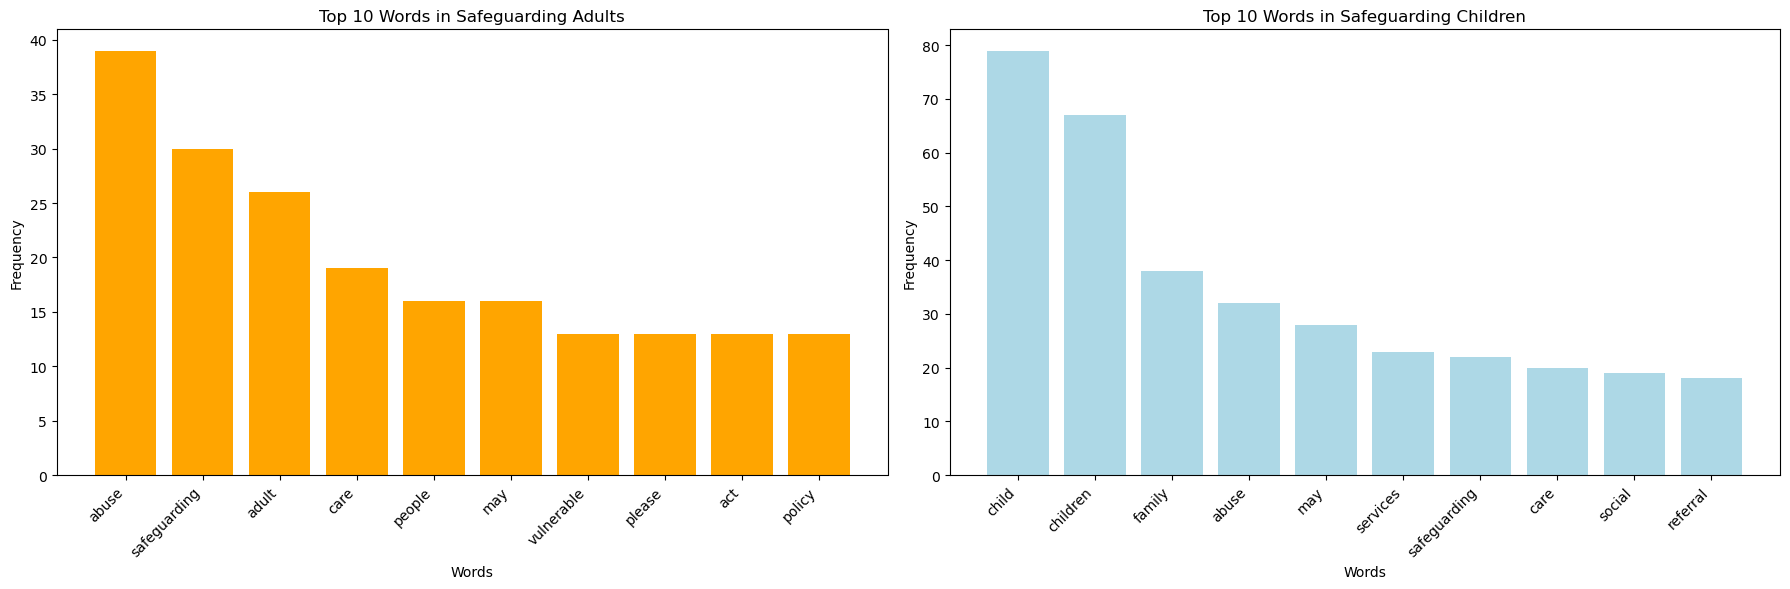

In [28]:
# Extracting words and their frequencies for plotting

words_adult_safety, counts_adult_safety = zip(*common_terms_adult_safety)

words_child_safety, counts_child_safety = zip(*common_terms_child_safety)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))


# Bar chart for "Safeguarding Adults"

axes[0].bar(words_adult_safety, counts_adult_safety, color='orange')

axes[0].set_title('Top 10 Words in Safeguarding Adults')

axes[0].set_xticks(range(len(words_adult_safety)))

axes[0].set_xticklabels(words_adult_safety, rotation=45, ha="right")


# Bar chart for "Safeguarding Children"

axes[1].bar(words_child_safety, counts_child_safety, color='lightblue')

axes[1].set_title('Top 10 Words in Safeguarding Children')

axes[1].set_xticks(range(len(words_child_safety)))

axes[1].set_xticklabels(words_child_safety, rotation=45, ha="right")



# Adding labels and title for overall figure

for ax in axes:

    ax.set_ylabel('Frequency')

    ax.set_xlabel('Words')



plt.tight_layout()

plt.show()

## Analysis focusing on key themes from the Health and Safety (pages 13-15), and Clinical Record Keeping (pages 16-19) sections

In [23]:
# Define the text content for "Health and Safety" and "Clinical Record Keeping" sections based on the information extracted

text_health_safety = """

"13": "Health and safety Regulations CQC - Outcome 10 'Working together to improve health and safety' At Mid Essex Health Trust we believe that healthy employees working in a safe environment is a key part to providing the best patient and visitor experience possible. We know that high standards of health and safety are not only good practice, but also a positive investment that protects our people who are clearly our most valuable asset. We have a legal and moral duty to not only protect our staff but visitors, contractors and patients, we cannot do this without everyone support. Our Trust have many measures in place to be proactive with health and safety: risk assessments are undertaken, visual inspection completed and there is a clear reporting procedure via Datix or directly to any relevant area. Please remember health and safety is everyone responsibility and we all need to work as a team to make MEHT as safe an environment that we can. Some of the most reported non-clinical incidents in the Trust  violence; harassment; aggression; assault  needle stick injury / sharps  personal injury incident  manual handling  Control of Substances Hazardous to Health (COSHH)  Slips / trips / falls Needles and sharps injuries Health care workers are at risk from sharps injuries (needle sticks) which can expose them to blood borne viruses (HIV, Hep B, Hep C). Standard Precautions Standard precautions such as hand washing, gloves, aprons and goggles can reduce risk of contact and exposure to bodily fluids. REMEMBER THAT OTHER STAFF WILL BE PUT AT INCREASED RISK IF YOU DO NOT DISPOSE OF SHARPS SAFELY. If you suffer a sharps injury If you do suffer an injury from a contaminated sharp, you must follow the Trust protocol below: 1. Encourage bleeding of the puncture wound. 2. Wash with soap under running water, dry and cover with a waterproof dressing. 3. Contact Occupational Health on 01245 514089 immediately or out of hours contact switchboard and notify Occupational Health the next working day. 4. Complete the Datix incident form. ALL STAFF MUST REPORT AND CHALLENGE ANY BAD PRACTICE Health and safety information  Lifting objects / inanimate loads (also known as manual handling)  To reduce the risk of musculoskeletal injuries it is helpful to:  stretch your back before lifting heavy objects always bend knees and not your back  turn using your whole body; don't twist your back carry objects close to your body  not carry too many things at once  ask someone to help you lift, particularly heavy objects  use mechanical handling equipment to lift things for you whenever possible. Your Mandatory Training Booklet | October 2014: First Edition page 13 ",
"14": "Guidelines for safer lifting and lowering of loads Women 3kg 7kg Shoulder height 7kg 13kg Men 10kg 5kg Shoulder height 20kg 10kg Elbow height Elbow height 10kg 16kg 25kg Knuckle height 15kg Knuckle height 7kg 13kg 20kg 10kg Mid lower leg height Mid lower leg height 3kg 7kg 10kg 5kg HSE Manual Handling Operation Regulations 1992 Slips, trips and falls Slips, trips and falls from height can all have serious consequences. They can be caused by various factors such as poor housekeeping, slippery / wet surfaces, uneven surfaces, unsuitable shoes / clothing and climbing on furniture. Preventative steps  Keep the workplace tidy.  Clean up spillages immediately. Report any potential hazards. . Wear the correct Personal Protective Equipment (PPE).  Restrict access to high risk areas.  Ensure regular and systematic cleaning.  Ensure that flooring is properly maintained.  Post warning signs in areas of risk and remove after use. . Ensure that areas are well lit and suit the task being performed.  Remove all possible floor obstructions Control of Substances Hazardous to Health (COSHH) It is important to control hazardous substances at work so that they do not cause ill health. The Trust is committed to the protection of staff from hazardous substances in line with the Control of Substances Hazardous to Health (COSHH) Regulations 2002 (as amended). Simple steps can be taken to ensure that you are working safely:  Use personal protective equipment (PPE) provided e.g. gloves, masks, respirators and overalls.  Follow standard operating procedures (SOPs) . Be familiar with your local COSHH file  Consult safety data sheets for information about the substance  Use control measures as instructed. Violence and aggression and physical assaults The Health and Safety Executive (HSE) definition of violence is 'any incident in which a person working in the healthcare sector is verbally abused, threatened or assaulted by a patient or member of the public in circumstances relating to his / her employment'. Remember to:  report all incidents of violence and aggression, threatening behaviour or physical assault via the electronic incident Datix form  follow local violence and aggression and lone working procedures  If you have been allocated one , use your lone working security device in accordance with your local procedure, if you are a lone worker . make yourself familiar with the Trust Violence and Aggression and Lone Working Policies. Stress The HSE defines stress as \"the adverse reaction a person has to excessive pressure or other types of demands placed on them\". page 14 Your Mandatory Training Booklet | October 2014: First Edition ",
"15": "Tips to tackle stress  Communicate with appropriate personnel (e.g. line manager, Employee Health Management Service or Staff Counselling).  Take regular breaks. Learn to relax.  Be organised.  Sort out your worries. Change what you can.  Look at your long-term priorities.  Improve your lifestyle and exercise regularly.  Consider changing work patterns  E.g. flexible working.  Focus on the positive aspects of your life. Hazard spotting If you spot a hazard and cannot fix it, then report it to the Ward/ Departmental Manager or Health and Safety Manager. Hazards can also be reported to the Estates Dept. and facilities Ext 6000. Working at height Although the vast majority of working at height tasks across the Trust are of very short duration and at low heights, it still needs to be considered as part of the risk assessment process. Footstools (elephant stools) and small step ladders are acceptable as long as they are in good condition and used correctly. For information on more complex working at heights tasks please see Trust policy number 09085 Policy / Further reading Risk Management Policies Contacts Health and Safety Team - Tel: 01245 516433 Moving and Handling Team - Tel: 01245 514781 MUST DO'S  Read this topic . Check that you understand it  Complete the record on the back page  BANK STAFF - complete, tear off and return the relevant training slip Your Mandatory Training Booklet | October 2014: First Edition page 15 ",
"""

text_clinical_record_keeping = """

"16": "Clinical Record Keeping What is record keeping? Good record keeping is an integral part of every healthcare professionals practice and is essential to the provision of safe and effective care. It is not an optional extra to be fitted in if circumstances allow. (NMC, 2009 GMC Good Medical Practice 2013/ Confidentiality 2009). The code standards of conduct, performance and ethics for clinicians  You must keep clear and accurate records of the discussions you have, the assessments you make, the treatment and medicines you give.  You must complete records as soon as possible after an event has occurred.  You must not tamper with original records in any way.  You must ensure any entries you make in someone's paper records are clearly and legibly signed, dated and timed.  You must ensure any entries you make in someone's electronic records are clearly attributable to you. . You must ensure all records are kept securely (NMC 2008, GMC Good Medical Practice 2013/ Confidentiality 2009). Why is record keeping important? Record keeping is part of the professional 'duty of care' owed by the clinician to the patient. Failure therefore to maintain reasonable standards of record keeping could be evidence of professional misconduct and subject to professional conduct proceedings. Who can document? Record keeping can be delegated to healthcare assistants (HCAs), assistant practitioners (APs) and student nurses or student doctors so that they can document the care they provide. As with any delegated activity, the registered nurse, midwife or doctor needs to ensure that the student or HCA/AP is competent to undertake the task and that it is in the patient's best interests for record keeping to be delegated. Supervision and a countersignature are required until the student/HCA/AP is deemed competent at keeping records. Registered nurses should only countersign if they have witnessed the activity or can validate that it took place. Organisations providing healthcare should supply clear guidance on record keeping for all staff, in line with the principles and guidance in the NMC's record keeping guidance. Good record keeping  Helps to improve accountability  Shows how decisions related to patient care were made  Supports the delivery of services  Supports effective clinical judgements and decisions Supports patient care and communications  Makes continuity of care easier  Provides documentary evidence of services delivered  Promotes better communication and sharing of information between members of the multi-professional healthcare team  Helps to identify risks and enables early detection of complications  Supports clinical audit, research, allocation of resources and page 16 Your Mandatory Training Booklet | October 2014: First Edition ",
"17": "performance planning  Helps to address complaints or legal processes. Examples of record Keeping Admission/discharge Multi-disciplinary records team notes Care plans Incident Evaluation sheets Audit record Observation charts Emails Pharmacy chart Letters to and from other health professionals Assessments Referrals Valuables and property record Order forms Text messages Fluid balance charts Electronic Patient Records (EPR) report/statements Laboratory reports Principles of good record keeping  Records should be meaningful, clear accounts of a patient's care  Handwriting should be legible . All entries should be signed. In the case of written records the person's name and job title should be printed alongside the first entry . You should put the date and time on all records. This should be in real time and chronological order and be as close to the actual time as possible . Records should be accurate and recorded in such a way that the meaning is clear  Records should be factual, not include unnecessary abbreviations, jargon, meaningless phrases or irrelevant speculation . You should use your professional judgement to decide what is relevant and what should be recorded . You should record details of any assessments, reviews undertaken and clear evidence of the arrangements made for future and on-going care. This should include details of information given about care and treatment  Records should identify any risks and show the action taken to deal with them  You have a duty to communicate fully and effectively with colleagues, ensuring they have all the information they need about the people in your care  You must not alter or destroy any records without being authorised to do SO  If you need to alter records, you must give your name and job title and sign and date the original documentation. The alternations made and the original record should be clear and auditable  Where appropriate the person in your care or their carer should be involved in the record keeping process  The language you use should be easily understood by the people in your care  Records should be readable when photocopied or scanned  you should not use coded expressions of sarcasm or humorous abbreviation to describe people in your care  You should not falsify records Your Mandatory Training Booklet | October 2014: First Edition page 17 ",
"18": "Examples of poor record keeping Times omitted D.O.B, address Illegible handwriting Unprofessional terminology Lack of entry in the record when calls are made to patients Meaningless phrases Abbreviations that are ambiguous Opinion mixed with facts Phone calls that omit names of callers/ recipient Reliance on information from neighbours without identifying the source Correction fluid/ covering errors Record completed by another carer who did not care for or visit the patient No signature/stamp Inaccuracies especially dates, names Absence of information about patient/child Delay in completing records Four arenas/areas of accountability Four arenas/areas of accountability Profession NMC Code of professional Conduct Guideline for Record and Record keeping Guidelines for Administration of Medicines GMC Good Medical Practice 2013/ Confidentiality 2009 Public - Criminal law/court Human Right Child Protection Confidentiality Act Data Protection Act Access to Information Department of Health Healthcare Professional including: Doctors, Nurses, Midwives, Allied Health Professionals Patient - Civil law/court Informed choice Information Documentation Contract/JD Mandatory study days Training and Development Appraisals/PDPs Policies/Guidelines Clinical Competences page 18 Your Mandatory Training Booklet | October 2014: First Edition ",
"19": "Legal matters and complaints  Patient records are sometimes called as evidence before a court of law in order to investigate a complaint. . They may also be used in evidence by the professional conduct committees (NMC/GMC) in complaints about professional misconduct by registered nurses and midwives or doctors. Summary  Poor records mean poor defence, no records means no defence' (Rodden 2002). . 'If it's not recorded, it has not been done' (NMC 2005). References  GMC (2013) Good Medical Practice/ Confidentiality (2009)  NMC (2008) The code standards of conduct, performance and ethics for nurses and midwives www.nmc-uk. org  NMC (2009) Record keeping: Guidance for nurses and midwives  RCN (2012) Record Keeping www.rcn. uk.org  Rodden, C (2002) Recording, Keeping, Developing Good Practice. Nursing Standard MUST DO's  Read this topic . Check that you understand it Complete the record on the back page  BANK STAFF - complete, tear off and return the relevant training slip Your Mandatory Training Booklet | October 2014: First Edition page 19 ",
"20": 
"""


# Tokenize the texts and filter out stopwords and punctuation

tokens_health_safety = [word.lower() for word in text_health_safety.split() if word.lower() not in stopwords and word.isalpha()]

tokens_clinical_record_keeping = [word.lower() for word in text_clinical_record_keeping.split() if word.lower() not in stopwords and word.isalpha()]



# Count the occurrences of each word in both texts

word_freq_health_safety = Counter(tokens_health_safety)

word_freq_clinical_record_keeping = Counter(tokens_clinical_record_keeping)



# Display the 10 most common words from each section

common_terms_health_safety = word_freq_health_safety.most_common(10)

common_terms_clinical_record_keeping = word_freq_clinical_record_keeping.most_common(10)



common_terms_health_safety, common_terms_clinical_record_keeping

([('health', 16),
  ('height', 11),
  ('working', 10),
  ('risk', 9),
  ('safety', 8),
  ('trust', 8),
  ('staff', 6),
  ('sharps', 5),
  ('control', 5),
  ('substances', 5)],
 [('record', 26),
  ('records', 20),
  ('keeping', 17),
  ('care', 12),
  ('must', 9),
  ('good', 8),
  ('professional', 8),
  ('information', 7),
  ('clear', 6),
  ('patient', 6)])

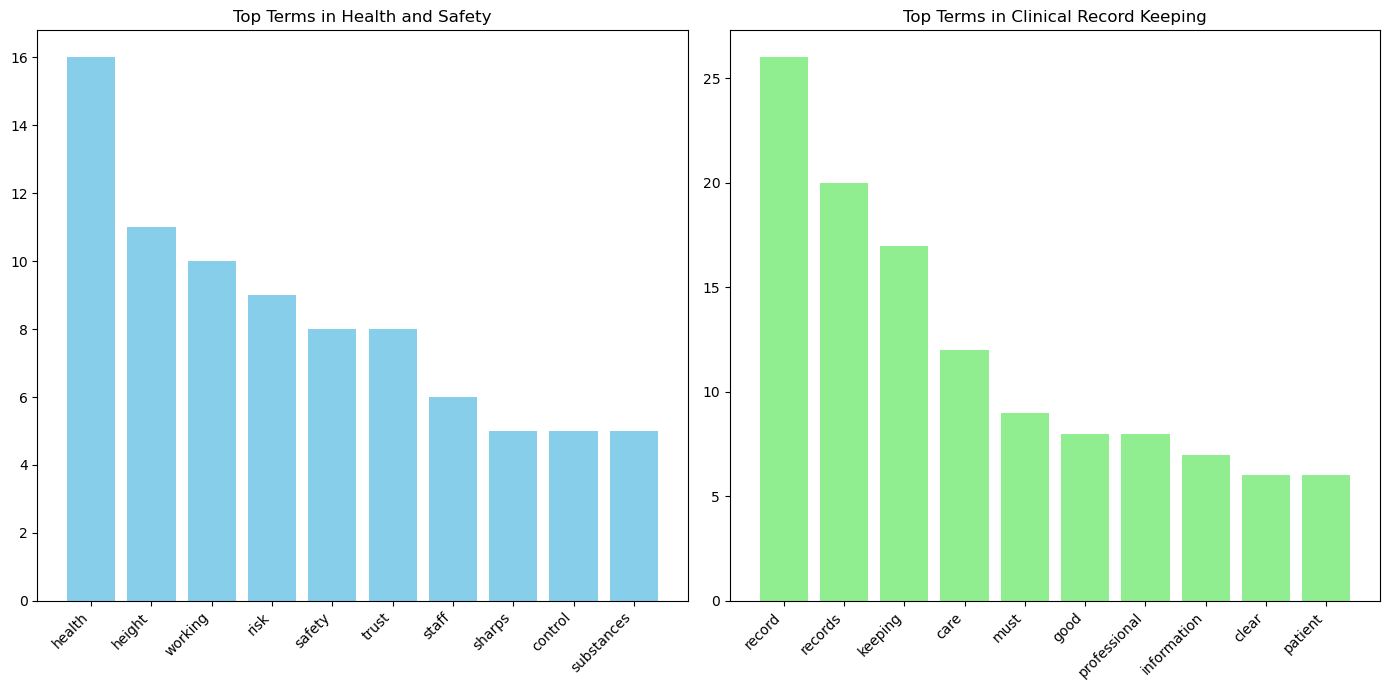

In [24]:
# Data preparation for visualization

health_safety_terms, health_safety_counts = zip(*common_terms_health_safety)

clinical_record_terms, clinical_record_counts = zip(*common_terms_clinical_record_keeping)


# Visualisation for "Health and Safety" section

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)

plt.bar(health_safety_terms, health_safety_counts, color='skyblue')

plt.title('Top Terms in Health and Safety')

plt.xticks(rotation=45, ha="right")


# Visualisation for "Clinical Record Keeping" section

plt.subplot(1, 2, 2)

plt.bar(clinical_record_terms, clinical_record_counts, color='lightgreen')

plt.title('Top Terms in Clinical Record Keeping')

plt.xticks(rotation=45, ha="right")



plt.tight_layout()

plt.show()